In [32]:
!pip install numpy

In [33]:
!pip install pandas

In [34]:
!pip install scikit-learn

In [35]:
!pip install matplotlib

In [36]:
!pip install seaborn

In [37]:
!pip install keras

In [38]:
#Import the necessary librabries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sn

In [39]:
#Import the dataset
df = pd.read_csv("/content/rawFedCycleData.csv")

In [40]:
#To view five rows out of the dataset
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


In [41]:
df.isnull()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1661,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1662,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1663,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
#ovulation_dataset=df

In [43]:
#ovulation_dataset.isnull().sum()

In [44]:
# view first 57 rows
df.head(57)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
5,nfp8122,6,0,1,0,26,,15,11,10,...,,,,,,,,,,
6,nfp8122,7,0,1,0,29,,16,13,,...,,,,,,,,,,
7,nfp8122,8,0,1,2,24,,14,10,9,...,,,,,,,,,,
8,nfp8122,9,0,1,0,28,,16,12,9,...,,,,,,,,,,
9,nfp8122,10,0,1,0,28,,17,11,13,...,,,,,,,,,,


In [45]:
df.dropna(subset=['Age'])

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,7,1,1,0,29,,19,10,13,...,,,,,,,,,,
1661,nfp8334,8,1,1,0,28,,17,11,12,...,,,,,,,,,,
1662,nfp8334,9,1,1,0,28,,16,12,11,...,,,,,,,,,,
1663,nfp8334,10,1,1,1,40,,27,13,13,...,,,,,,,,,,


In [46]:
# Data preprocessing
# Select relevant features and target variable (e.g., 'EstimatedDayofOvulation' LengthofLutealPhase)
ovulation_dataset = df[['EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofCycle']]

In [47]:
#To determine the shape of the dataset
ovulation_dataset.shape

(1665, 3)

In [48]:
ovulation_dataset.head(57)

,EstimatedDayofOvulation,LengthofLutealPhase,LengthofCycle
0,17,12,29
1,15,12,27
2,15,14,29
3,15,12,27
4,16,12,28
5,15,11,26
6,16,13,29
7,14,10,24
8,16,12,28
9,17,11,28


In [49]:
ovulation_dataset.head(57)

,EstimatedDayofOvulation,LengthofLutealPhase,LengthofCycle
0,17,12,29
1,15,12,27
2,15,14,29
3,15,12,27
4,16,12,28
5,15,11,26
6,16,13,29
7,14,10,24
8,16,12,28
9,17,11,28


In [50]:
ovulation_dataset.loc[54]

,54
EstimatedDayofOvulation,
LengthofLutealPhase,
LengthofCycle,29


In [51]:
# Clean the 'EstimatedDayofOvulation' column by replacing empty strings with NaN and converting to float
ovulation_dataset['EstimatedDayofOvulation'] = pd.to_numeric(df['EstimatedDayofOvulation'], errors='coerce')

/tmp/ipython-input-3657882898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['EstimatedDayofOvulation'] = pd.to_numeric(df['EstimatedDayofOvulation'], errors='coerce')


In [52]:
# Clean the 'LengthofLutealPhase  ' column by replacing empty strings with NaN and converting to float
ovulation_dataset['LengthofLutealPhase'] = pd.to_numeric(df['LengthofLutealPhase'], errors='coerce')

/tmp/ipython-input-565036484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['LengthofLutealPhase'] = pd.to_numeric(df['LengthofLutealPhase'], errors='coerce')


In [53]:
# Clean the 'LengthofCycle' column by replacing empty strings with NaN and converting to float
ovulation_dataset['LengthofCycle'] = pd.to_numeric(df['LengthofCycle'], errors='coerce')

/tmp/ipython-input-2775333240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['LengthofCycle'] = pd.to_numeric(df['LengthofCycle'], errors='coerce')


In [54]:
# Find the mode of the 'EstimatedDayofOvulation' column
mode_EstimatedDayofOvulation = ovulation_dataset['EstimatedDayofOvulation'].mode()[0]

# Print the mode value
print("Mode of 'EstimatedDayofOvulation' column:", mode_EstimatedDayofOvulation)

# Fill the missing values in 'EstimatedDayofOvulation' column with the mode value
ovulation_dataset['EstimatedDayofOvulation'].fillna(mode_EstimatedDayofOvulation, inplace=True)

Mode of 'EstimatedDayofOvulation' column: 14.0


/tmp/ipython-input-2462826764.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ovulation_dataset['EstimatedDayofOvulation'].fillna(mode_EstimatedDayofOvulation, inplace=True)
/tmp/ipython-input-2462826764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['EstimatedDayofOvulation'].fillna(mode_EstimatedDayofOvulation, inp

In [55]:
# Find the mode of the 'EstimatedDayofOvulation' column
mode_LengthofLutealPhase = ovulation_dataset['LengthofLutealPhase'].mode()[0]

# Print the mode value
print("Mode of 'LengthofLutealPhase' column:", mode_LengthofLutealPhase)

# Fill the missing values in 'LengthofLutealPhase' column with the mode value
ovulation_dataset['LengthofLutealPhase'].fillna(mode_LengthofLutealPhase, inplace=True)

Mode of 'LengthofLutealPhase' column: 13.0


/tmp/ipython-input-4263415791.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ovulation_dataset['LengthofLutealPhase'].fillna(mode_LengthofLutealPhase, inplace=True)
/tmp/ipython-input-4263415791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['LengthofLutealPhase'].fillna(mode_LengthofLutealPhase, inplace=True)


In [56]:
# Find the mode of the 'EstimatedDayofOvulation' column
mode_LengthofCycle = ovulation_dataset['LengthofCycle'].mode()[0]

# Print the mode value
print("Mode of 'LengthofCycle' column:", mode_LengthofCycle)

# Fill the missing values in 'LengthofCycle' column with the mode value
ovulation_dataset['LengthofCycle'].fillna(mode_LengthofCycle, inplace=True)

Mode of 'LengthofCycle' column: 28


/tmp/ipython-input-1281377050.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ovulation_dataset['LengthofCycle'].fillna(mode_LengthofCycle, inplace=True)
/tmp/ipython-input-1281377050.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['LengthofCycle'].fillna(mode_LengthofCycle, inplace=True)


In [57]:
ovulation_dataset.isnull().sum()

,0
EstimatedDayofOvulation,0
LengthofLutealPhase,0
LengthofCycle,0


In [58]:
ovulation_dataset.head(57)

,EstimatedDayofOvulation,LengthofLutealPhase,LengthofCycle
0,17.0,12.0,29
1,15.0,12.0,27
2,15.0,14.0,29
3,15.0,12.0,27
4,16.0,12.0,28
5,15.0,11.0,26
6,16.0,13.0,29
7,14.0,10.0,24
8,16.0,12.0,28
9,17.0,11.0,28


In [59]:
ovulation_dataset.tail()

,EstimatedDayofOvulation,LengthofLutealPhase,LengthofCycle
1660,19.0,10.0,29
1661,17.0,11.0,28
1662,16.0,12.0,28
1663,27.0,13.0,40
1664,14.0,13.0,24


In [60]:
#To determine the datatype and the data columns of the dataset
ovulation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EstimatedDayofOvulation  1665 non-null   float64
 1   LengthofLutealPhase      1665 non-null   float64
 2   LengthofCycle            1665 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 39.2 KB


In [61]:
#Splitting the dataset
'''After preprocessing the dataset, it was then splitted into features and target set.
X represent the features dataset, while Y represent the target dataset.
The drop() function used here is used to drop the 'Length of Cycle' from the dataset so as to separate it from the features dataset.
It is therefore shown below:'''
X = ovulation_dataset.drop('LengthofCycle', axis= 1)
y = ovulation_dataset['LengthofCycle']

In [62]:
#To view the values of X dataset
#The X represent the features dataset. It is shown by just typing X as shown in the figure below:
X

,EstimatedDayofOvulation,LengthofLutealPhase
0,17.0,12.0
1,15.0,12.0
2,15.0,14.0
3,15.0,12.0
4,16.0,12.0
...,...,...
1660,19.0,10.0
1661,17.0,11.0
1662,16.0,12.0
1663,27.0,13.0


In [63]:
X

,EstimatedDayofOvulation,LengthofLutealPhase
0,17.0,12.0
1,15.0,12.0
2,15.0,14.0
3,15.0,12.0
4,16.0,12.0
...,...,...
1660,19.0,10.0
1661,17.0,11.0
1662,16.0,12.0
1663,27.0,13.0


In [64]:
y

,LengthofCycle
0,29
1,27
2,29
3,27
4,28
...,...
1660,29
1661,28
1662,28
1663,40


In [65]:
#Split the dataset into training and testing set
'''The 'X_train' represent the 85% of the training dataset. The 'X_test' represent the 15% for testing the model.
The 'y_train' represent the 85% of the target dataset that was used to train the model.
The 'y_test' represent the 15% of the target dataset that was used to test the model.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [66]:
#To develop the model the following was carried out:
from sklearn.tree import DecisionTreeRegressor
#Create an instance of the Decision Tree model
decision_tree = DecisionTreeRegressor()

In [67]:
#Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [68]:
from sklearn.metrics import r2_score

In [69]:
# Now, you can proceed with making predictions
y_pred = decision_tree.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error

mse_RF = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse_RF}")

Mean Squared Error on Test Data: 2.115619811988705


In [71]:
# Calculate the R-squared score
print("R-squared score for the decision tree model: ", r2_score(y_test, y_pred))

R-squared score for the decision tree model:  0.8552728056078933


In [72]:
R_MSE = np.sqrt(mse_RF)

In [73]:
print("Root Mean Square Error for the decision tree model: ", R_MSE)

Root Mean Square Error for the decision tree model:  1.4545170373662542


In [74]:
absolute_errors = np.abs(y_test - y_pred)
mae = np.mean(absolute_errors)
print("Mean Absolute Error (MAE) for the decision tree model:", mae)

Mean Absolute Error (MAE) for the decision tree model: 0.4308659754224271


In [75]:
#Picke the model
import pickle
import joblib
pd.to_pickle(decision_tree,  "C:\\Users\\hp\\Desktop\\DecisonTreeModel.pickle")
filename= 'saved_model.sav'
saved_model= joblib.dump(decision_tree, filename)

In [76]:
#Unpickle model
pd.to_pickle(decision_tree, "C:\\Users\\hp\\Desktop\\DecisonTreeModel.pickle")

In [83]:
#Take input from users
EstimatedOvulationDay = int(input("Enter Estimated ovulation day: "))
LengthofLutealPhase = int(input("Enter your length of luteal phase: "))
result = decision_tree.predict([[EstimatedOvulationDay, LengthofLutealPhase ]])
print("Your menstrual cycle length is:", result)

Enter Estimated ovulation day: 7
Enter your length of luteal phase: 7
Your menstrual cycle length is: [18.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [84]:
#Testing the trained model using the X_train set
y_train_predict = decision_tree.predict(X_train)

In [85]:
y_train_predict

array([23., 28., 29., ..., 26., 26., 26.])

In [86]:
y_test_predict = decision_tree.predict(X_test)

In [87]:
y_test_predict

array([31.        , 23.        , 25.        , 26.        , 23.        ,
       29.25      , 26.        , 28.        , 26.06451613, 28.        ,
       26.        , 42.        , 29.25      , 32.        , 38.        ,
       29.        , 29.05      , 30.        , 27.        , 26.06451613,
       28.        , 32.        , 28.        , 28.        , 33.        ,
       35.        , 28.7       , 28.        , 29.25      , 32.        ,
       25.        , 37.        , 28.        , 34.        , 29.25      ,
       26.        , 26.        , 39.        , 27.        , 38.        ,
       28.        , 25.        , 42.        , 37.        , 29.        ,
       30.        , 29.05      , 28.        , 28.7       , 31.        ,
       25.        , 29.        , 29.        , 26.        , 29.25      ,
       26.        , 31.        , 31.        , 27.        , 31.        ,
       38.        , 29.        , 27.        , 25.        , 29.        ,
       28.        , 32.        , 29.        , 29.        , 25.  

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

Mean Squared Error: 2.115619811988705


TypeError: got an unexpected keyword argument 'squared'

In [89]:
#Split the dataset into training and testing set
'''The 'X_train' represent the 85% of the training dataset. The 'X_test' represent the 15% for testing the model.
The 'y_train' represent the 85% of the target dataset that was used to train the model.
The 'y_test' represent the 15% of the target dataset that was used to test the model.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
y_pred_RF = rf.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_RF)
print("Mean Squared Error for Random Forest Algorithm:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_RF, squared=False)
print("Root Mean Squared Error for Random Forest Algorithm:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_RF)
print("Mean Absolute Error for Random Forest Algorithm:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_RF)
print("R-squared for Random Forest Algorithm:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_RF)
print("Mean Absolute Percentage Error for Random Forest Algorithm:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_RF)
print("Explained Variance Score for Random Forest Algorithm:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_RF)
print("Median Absolute Error for Random Forest Algorithm:", medae)

Mean Squared Error for Random Forest Algorithm: 2.548


TypeError: got an unexpected keyword argument 'squared'

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
#Split the dataset into training and testing set
'''The 'X_train' represent the 85% of the training dataset. The 'X_test' represent the 15% for testing the model.
The 'y_train' represent the 85% of the target dataset that was used to train the model.
The 'y_test' represent the 15% of the target dataset that was used to test the model.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [95]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [96]:
# Make predictions and evaluate the model's performance
y_pred_LR = lr_model.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_LR)
print("Mean Squared Error for Linear Regression:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_LR, squared=False)
print("Root Mean Squared Error for Linear Regression:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_LR )
print("Mean Absolute Error for Linear Regression:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_LR )
print("R-squared for Linear Regression:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_LR )
print("Mean Absolute Percentage Error for Linear Regression:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_LR)
print("Explained Variance Score for Linear Regression:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_LR)
print("Median Absolute Error for Linear Regression:", medae)


Mean Squared Error for Linear Regression: 2.244812209725293


TypeError: got an unexpected keyword argument 'squared'

NameError: name 'y_train_predlr' is not defined

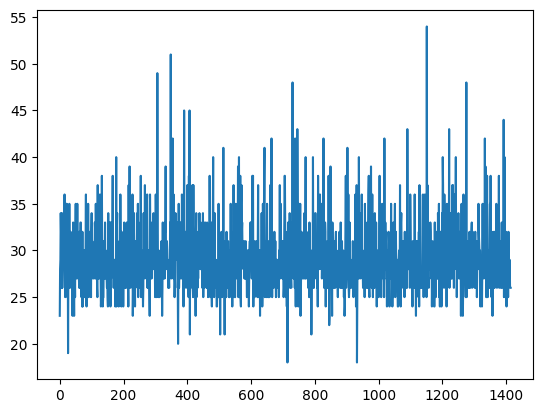

In [98]:
x =  range(len(y_train))

plt.plot(x, y_train, label='Actual')
plt.plot(x, y_train_predlr, label='Predicted')

plt.xlabel('Cycle Index')
plt.ylabel('Cycle Length (days)')
plt.title('Actual vs. Predicted Menstrual Cycle Length (LR)')

plt.legend()
plt.show()

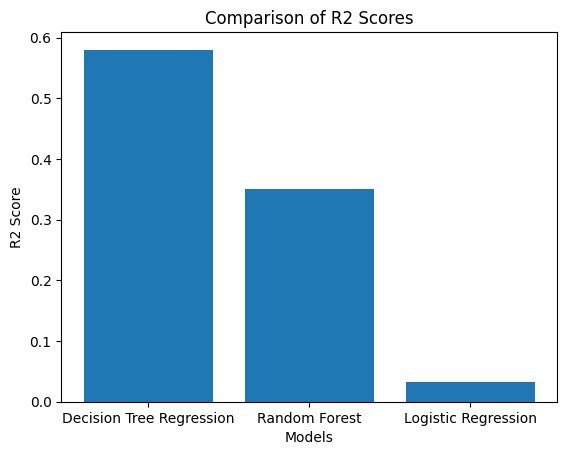

In [99]:
import matplotlib.pyplot as plt

models = ['Decision Tree Regression', 'Random Forest', 'Logistic Regression']
r2_scores = [0.58, 0.35, 0.033]  # Example R2 scores

plt.bar(models, r2_scores)

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores')

plt.show()

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
#Split the dataset into training and testing set
'''The 'X_train' represent the 85% of the training dataset. The 'X_test' represent the 15% for testing the model.
The 'y_train' represent the 85% of the target dataset that was used to train the model.
The 'y_test' represent the 15% of the target dataset that was used to test the model.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [102]:
# This section for Huber Regressor
huber_reg = HuberRegressor(epsilon=1.35)  # You can adjust the epsilon parameter
huber_reg.fit(X_train, y_train)

HuberRegressor()

In [103]:
# Make predictions on the test set
y_pred_HuberReg = huber_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_HuberReg)
print("Mean Squared Error for Huber Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_HuberReg, squared=False)
print("Root Mean Squared Error for Huber Regressor:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_HuberReg )
print("Mean Absolute Error for Huber Regressor:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_HuberReg)
print("R-squared for Huber Regressor:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_HuberReg)
print("Mean Absolute Percentage Error for Huber Regressor:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_HuberReg)
print("Explained Variance Score for Huber Regressor:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_HuberReg)
print("Median Absolute Error for Huber Regressor:", medae)

In [ ]:
# For least Angle Regresion

In [104]:
from sklearn.linear_model import Lars

In [105]:
lars = Lars()
lars.fit(X_train, y_train)

Lars()

In [106]:
# Make predictions on the test set.
y_pred_LARS = lars.predict(X_test)

In [107]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_LARS)
print("Mean Squared Error for Least Angle Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_LARS, squared=False)
print("Root Mean Squared Error for Least Angle Regressor:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_LARS)
print("Mean Absolute Error for Least Angel Regressor:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_LARS)
print("R-squared for Huber Regressor:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_LARS)
print("Mean Absolute Percentage Error for Least Angel Regressor:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_LARS)
print("Explained Variance Score for Least Angel Regressor:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_LARS)
print("Median Absolute Error for Least Angel Regressor:", medae)

Mean Squared Error for Least Angle Regressor: 2.2448122097252936


TypeError: got an unexpected keyword argument 'squared'

In [108]:
# For least Angle Regresion

In [109]:
from sklearn.linear_model import Lasso

In [110]:
# Initialize the Lasso regression model.
lasso = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed.

In [111]:
# Train the Lasso model on the training data.
lasso.fit(X_train, y_train)

Lasso()

In [112]:
# Make predictions on the test set.
y_pred_lasso = lasso.predict(X_test)

In [113]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error for Least Angle Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_LARS, squared=False)
print("Root Mean Squared Error for Lasso Regression:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error for Lasso Regression:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_lasso)
print("R-squared for Lasso Regression:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_lasso)
print("Mean Absolute Percentage Error for Lasso Regression:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_lasso)
print("Explained Variance Score for Lasso Regresion:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_lasso)
print("Median Absolute Error for Lasso Regression:", medae)

Mean Squared Error for Least Angle Regressor: 2.6556375290485628


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
# For least Angle Regresion

In [117]:
from sklearn.linear_model import LassoLars

In [118]:
# Initialize the LassoLars regression model.
lasso_lars = LassoLars(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed.

In [119]:
# Train the LassoLars model on the training data.
lasso_lars.fit(X_train, y_train)

LassoLars()

In [120]:
# Make predictions on the test set.
y_pred_lasso_lars = lasso_lars.predict(X_test)

In [121]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lasso_lars)
print("Mean Squared Error for Lasso Least Angle Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_lasso_lars, squared=False)
print("Root Mean Squared Error for Lasso Least Angle Regression:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lasso_lars)
print("Mean Absolute Error for Lasso Least Angel Regression:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_lasso_lars)
print("R-squared for Lasso Least Angel Regression:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_lasso_lars)
print("Mean Absolute Percentage Error for Lasso Least Angel Regression:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_lasso_lars)
print("Explained Variance Score for Lasso Least Regresion:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_lasso_lars)
print("Median Absolute Error for Lasso Least Angle Regression:", medae)

Mean Squared Error for Lasso Least Angle Regressor: 2.6556249498111666


TypeError: got an unexpected keyword argument 'squared'

In [122]:
# Extract the selected features and their coefficients.
selected_features_lasso_lars = X.columns[lasso_lars.coef_ != 0]
coefficients_lasso_lars = lasso_lars.coef_[lasso_lars.coef_ != 0]
print("Selected Features (LassoLars):", selected_features_lasso_lars)
print("Coefficients (LassoLars):", coefficients_lasso_lars)

Selected Features (LassoLars): Index(['EstimatedDayofOvulation', 'LengthofLutealPhase'], dtype='object')
Coefficients (LassoLars): [0.80405827 0.72388784]


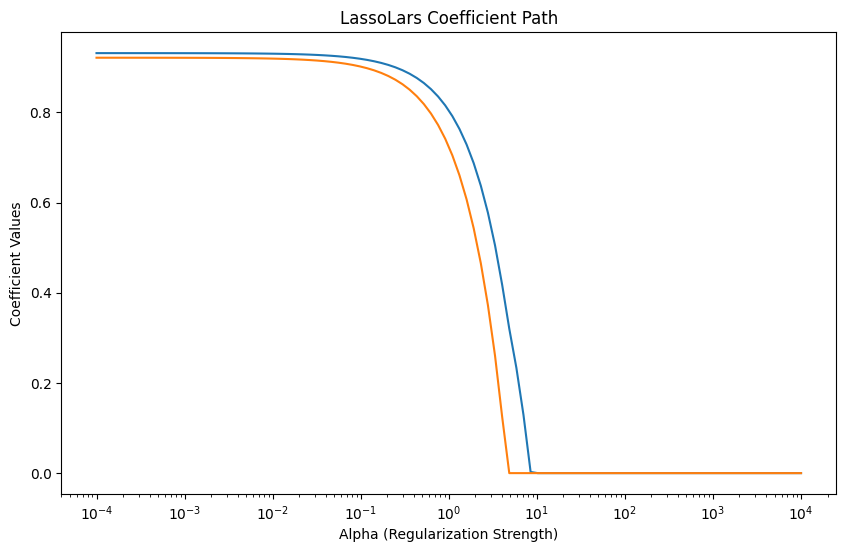

In [123]:
# Vary Alpha and Path Visualization
import numpy as np
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 4, 100)  # Vary alpha values over a range
coefs = []

for alpha in alphas:
    lasso_lars = LassoLars(alpha=alpha)
    lasso_lars.fit(X_train, y_train)
    coefs.append(lasso_lars.coef_)

# Plot the path of coefficients vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Values')
plt.title('LassoLars Coefficient Path')
plt.axis('tight')
plt.show()

In [ ]:
# Dummy Regression

In [124]:
from sklearn.dummy import DummyRegressor

In [125]:
# Initialize the Dummy Regressor with the "mean" strategy.
dummy_regressor = DummyRegressor(strategy="mean")

In [126]:
# Train the Dummy Regressor (no actual training is needed for this strategy).
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [127]:
# Make predictions using the Dummy Regressor.
y_pred_dummy = dummy_regressor.predict(X_test)

In [ ]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_dummy)
print("Mean Squared Error for Dummy Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_dummy, squared=False)
print("Root Mean Squared Error for Dummy Regressor:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_dummy)
print("Mean Absolute Error for Dummy Regressor:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_dummy)
print("R-squared for Dummy Regressor:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_dummy)
print("Mean Absolute Percentage Error for Dummy Regressor", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_dummy)
print("Explained Variance Score for Dummy Regressor:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_dummy)
print("Median Absolute Error for Dummy Regressor:", medae)

In [ ]:
# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [128]:
# Initialize the Ridge regression model with a specific alpha value.
ridge = Ridge(alpha=1.0)  # You can adjust the alpha value as needed.

NameError: name 'Ridge' is not defined

In [129]:
# Train the Ridge model on the training data.
ridge.fit(X_train, y_train)

NameError: name 'ridge' is not defined

In [130]:
# Make predictions using the Ridge model.
y_pred_ridge = ridge.predict(X_test)

NameError: name 'ridge' is not defined

In [131]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error for ridge Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Root Mean Squared Error for Ridge Regressor:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error for Ridge Regressor:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_ridge)
print("R-squared for Ridge Regressor:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
print("Mean Absolute Percentage Error for Ridge Regressor", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_ridge)
print("Explained Variance Score for Ridge Regressor:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_ridge)
print("Median Absolute Error for Ridge Regressor:", medae)

NameError: name 'y_pred_ridge' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [132]:
# Initialize the K Neighbors Regressor with a specific number of neighbors (k).
k_neighbors_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed.

NameError: name 'KNeighborsRegressor' is not defined

In [ ]:
k_neighbors_regressor.fit(X_train, y_train)

In [ ]:
# Make predictions using the Ridge model.
y_pred_k_neighbors_regressor = k_neighbors_regressor.predict(X_test)

In [ ]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_k_neighbors_regressor)
print("Mean Squared Error for KNN:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_k_neighbors_regressor, squared=False)
print("Root Mean Squared Error for KNN:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_k_neighbors_regressor)
print("Mean Absolute Error for KNN:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_k_neighbors_regressor)
print("R-squared for KNN:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_k_neighbors_regressor)
print("Mean Absolute Percentage Error for KNN", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_k_neighbors_regressor)
print("Explained Variance Score for KNN:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_k_neighbors_regressor)
print("Median Absolute Error for KNN:", medae)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example values for 'n_neighbors'
    # You can include other hyperparameters and their ranges as needed.
}

In [ ]:
k_neighbors_regressor = KNeighborsRegressor()
grid_search = GridSearchCV(k_neighbors_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# access the best hyperparameters and the best model.
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
# Evaluate the best model
y_pred_best_KNN = best_estimator.predict(X_test)

In [ ]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_best_KNN)
print("Mean Squared Error for y_pred_best_KNN:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_best_KNN, squared=False)
print("Root Mean Squared Error for y_pred_best_KNN:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_best_KNN)
print("Mean Absolute Error for y_pred_best_KNN:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_best_KNN)
print("R-squared for y_pred_best_KNN:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_best_KNN)
print("Mean Absolute Percentage Error for y_pred_best_KNN", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_best_KNN)
print("Explained Variance Score for y_pred_best_KNN:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_best_KNN)
print("Median Absolute Error for y_pred_best_KNN:", medae)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Initialize the Elastic Net model with specific alpha and l1_ratio values.
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust 'alpha' and 'l1_ratio' as needed.

In [ ]:
# Train the Elastic Net model on the training data.
elastic_net.fit(X_train, y_train)

In [ ]:
# Make predictions using the Elastic Net model.
y_pred_elastic_net = elastic_net.predict(X_test)

In [ ]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_elastic_net)
print("Mean Squared Error for Elastic Net:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_elastic_net, squared=False)
print("Root Mean Squared Error for Elastic Net:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_elastic_net)
print("Mean Absolute Error for Elastic Net:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_elastic_net)
print("R-squared for Elastic Net:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_elastic_net)
print("Mean Absolute Percentage Error for Elastic Net", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_elastic_net)
print("Explained Variance Score for Elastic Net:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_elastic_net)
print("Median Absolute Error for Elastic Net", medae)

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [ ]:
# Initialize the Orthogonal Matching Pursuit model with the desired number of features.
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=2)  # Adjust the number of features as needed.

In [ ]:
# Train the OMP model on the training data.
omp.fit(X_train, y_train)

In [ ]:
# Make predictions using the Orthogonal Matching Pursuit model.
y_pred_omp = omp.predict(X_test)

In [ ]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_omp)
print("Mean Squared Error for Orthogonal Matching Pursuit:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_omp, squared=False)
print("Root Mean Squared Error for Orthogonal Matching Pursuit:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_omp)
print("Mean Absolute Error for Othogonal Matching Pursuit:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_omp)
print("R-squared for Othogonal Matching Pursuit:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_omp)
print("Mean Absolute Percentage Error for Othogonal Matching Pursuit", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_omp)
print("Explained Variance Score for orthogonal Matchiing Pursuit:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_omp)
print("Median Absolute Error for Orthogonal Matching Pursuit", medae)